In [130]:
import numpy as np
import pandas as pd
import geopandas as gp
import folium as fl
import seaborn as sns
import pylab as plt
from IPython.display import HTML

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = gp.GeoDataFrame.from_file('air/schools.shp')
df.columns

Index([u'Join_Count', u'TARGET_FID',   u'ATS_CODE',       u'BORO',
          u'BORONUM',   u'LOC_CODE', u'SCHOOLNAME',   u'SCH_TYPE',
       u'MANAGED_BY', u'GEO_DISTRI', u'ADMIN_DIST',    u'ADDRESS',
       u'STATE_CODE',        u'ZIP',  u'PRINCIPAL',    u'PRIN_PH',
              u'FAX',     u'GRADES',       u'City',    u'STATEFP',
         u'COUNTYFP',    u'TRACTCE',      u'GEOID',       u'NAME',
         u'NAMELSAD',      u'MTFCC',   u'FUNCSTAT',      u'ALAND',
           u'AWATER',   u'INTPTLAT',   u'INTPTLON', u'GEOID_Data',
         u'B20001e1',   u'B19013e1',  u'B19013Ae1',       u'MEAN',
         u'geometry'],
      dtype='object')

In [4]:
df=df[['BORO','SCHOOLNAME','SCH_TYPE','ZIP','PRINCIPAL','GRADES','MEAN','B19013e1','geometry']]
df = df[df.BORO=='K']
print("Rows and columns: ",df.shape)
df.head()

('Rows and columns: ', (524, 9))


,BORO,SCHOOLNAME,SCH_TYPE,ZIP,PRINCIPAL,GRADES,MEAN,B19013e1,geometry
0,K,P.S. 001 THE BERGEN,Elementary,11220,Jennifer Eusanio,"PK,0K,01,02,03,04,05,SE",10.528325,57955.0,POINT (980985.0540901721 175780.7590526789)
1,K,M.S. 002,Junior High-Intermediate-Middle,11226,ADRIENNE SPENCER,"06,07,08,SE",8.856425,45030.0,POINT (997785.1363035887 178431.9109025896)
2,K,P.S. 095 THE GRAVESEND,K-8,11223,Janet Ndzibah,"PK,0K,01,02,03,04,05,06,07,08,SE",7.795466,53417.0,POINT (991224.9830853343 156323.3612877578)
3,K,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,11204,Denise Sandra Levinsky,"06,07,08,SE",7.997554,37350.0,POINT (988439.681241259 160709.9926063418)
4,K,P.S. 97 THE HIGHLAWN,Elementary,11223,KRISTINE MUSTILLO,"PK,0K,01,02,03,04,05,SE",7.796065,52328.0,POINT (988205.0727865845 158329.5911991745)


In [5]:
# Drop observations where air pollution or income are zero, or are extremely high

print(df.shape)
print(df[df.B19013e1>0].shape)

df=df[(df.B19013e1 > 0) & (df.MEAN > 0) & (df.B19013e1 < 180000)]

print(df.shape)

(524, 9)
(517, 9)
(511, 9)


In [6]:
# What does the range of air pollution and income look like?

print(df.MEAN.describe())
print

print(df.B19013e1.describe())

count    511.000000
mean       8.964756
std        0.849914
min        7.326025
25%        8.434356
50%        8.812008
75%        9.525741
max       11.499275
Name: MEAN, dtype: float64

count       511.000000
mean      54685.632094
std       26382.212820
min       12052.000000
25%       37625.000000
50%       46953.000000
75%       67454.000000
max      146458.000000
Name: B19013e1, dtype: float64


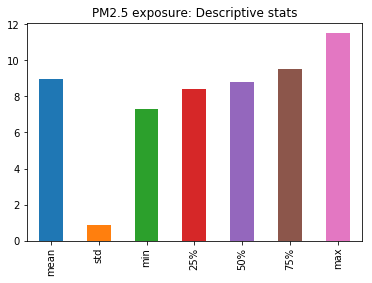

In [11]:
df.MEAN.describe()[1:].plot(kind="bar",title="PM2.5 exposure: Descriptive stats")

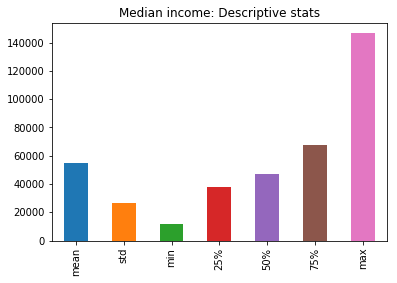

In [10]:
df.B19013e1.describe()[1:].plot(kind="bar",title="Median income: Descriptive stats")

Elementary                         200
High school                        112
Junior High-Intermediate-Middle     88
K-8                                 56
Secondary School                    28
K-12 all grades                     20
Early Childhood                      7
Name: SCH_TYPE, dtype: int64


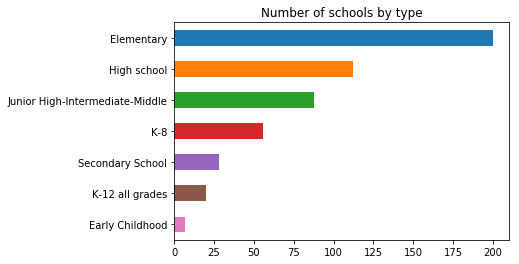

In [13]:
# Which school types are included?

print(df.SCH_TYPE.value_counts())
df.SCH_TYPE.value_counts().plot(kind="barh",title="Number of schools by type").invert_yaxis();

Text(0,0.5,'Frequency')

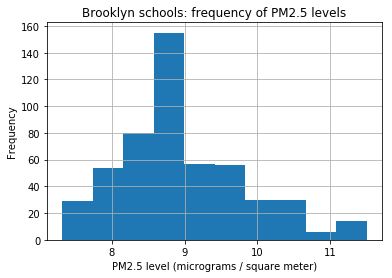

In [14]:
# As a histogram of PM2.5 exposure for all BK schools

f,ax = plt.subplots(1,figsize=[6,4])
df.MEAN.hist(ax=ax)
plt.title("Brooklyn schools: frequency of PM2.5 levels");
plt.xlabel("PM2.5 level (micrograms / square meter)")
plt.ylabel("Frequency")

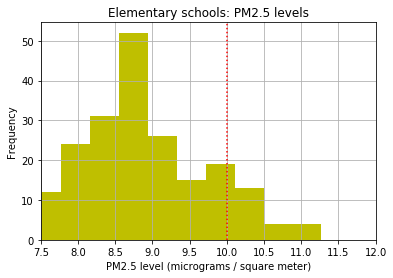

In [85]:
# For elementary schools

f,ax = plt.subplots(1,figsize=[6,4])
df[df.SCH_TYPE=='Elementary'].MEAN.hist(ax=ax,color='y')
plt.title("Elementary schools: PM2.5 levels");
plt.xlabel("PM2.5 level (micrograms / square meter)")
plt.ylabel("Frequency")
plt.xlim(7.5,12)
plt.axvline(x=10,linestyle='dotted',color='r')



(7.5, 12)

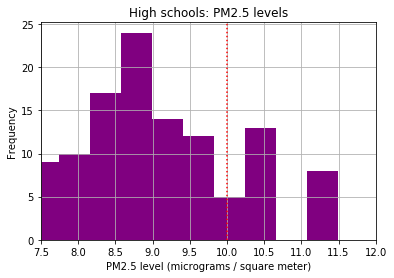

In [86]:
# For elementary schools

f,ax = plt.subplots(1,figsize=[6,4])
df[df.SCH_TYPE=='High school'].MEAN.hist(ax=ax,color='purple')
plt.title("High schools: PM2.5 levels");
plt.xlabel("PM2.5 level (micrograms / square meter)")
plt.ylabel("Frequency")
plt.axvline(x=10,linestyle='dotted',color='r')

plt.xlim(7.5,12)

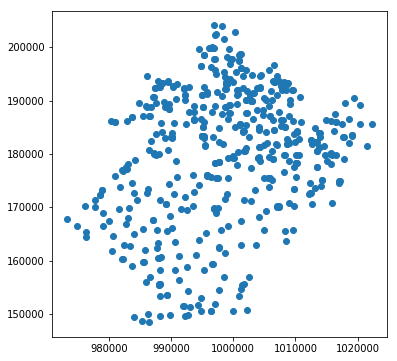

In [20]:
# Simple plot of the school locations

f,ax = plt.subplots(1,figsize=[6,6])
df.plot(ax=ax)

### Separate out the schools by wealth of their census tract
Group the schools by percentile (lowest 20%, top 20% etc)

In [21]:
df['quartile_'] = pd.qcut(df.B19013e1, 4)

In [64]:
print("Number per quartile group:")
df.quartile_.value_counts()

Number per quartile group:


1    129
0    129
3    127
2    126
Name: quartile_, dtype: int64

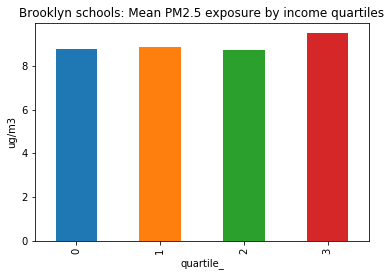

In [116]:
df.groupby('quartile_')['MEAN'].mean().plot(kind='bar')
plt.title("Brooklyn schools: Mean PM2.5 exposure by income quartiles")
plt.ylabel("ug/m3");

In [107]:
df.groupby('quartile_')['MEAN'].apply(lambda c : (c>10).sum()/len(c))

quartile_
0    0
1    0
2    0
3    0
Name: MEAN, dtype: int64

In [88]:
for i in range(4):
    print("Mean PM2.5 for quartile {}: {:.2f} 10 µg/m3".
          format(i+1,df.loc[df.quartile_==i].mean()[1]))   

Mean PM2.5 for quartile 1: 8.80 10 µg/m3
Mean PM2.5 for quartile 2: 8.86 10 µg/m3
Mean PM2.5 for quartile 3: 8.71 10 µg/m3
Mean PM2.5 for quartile 4: 9.49 10 µg/m3


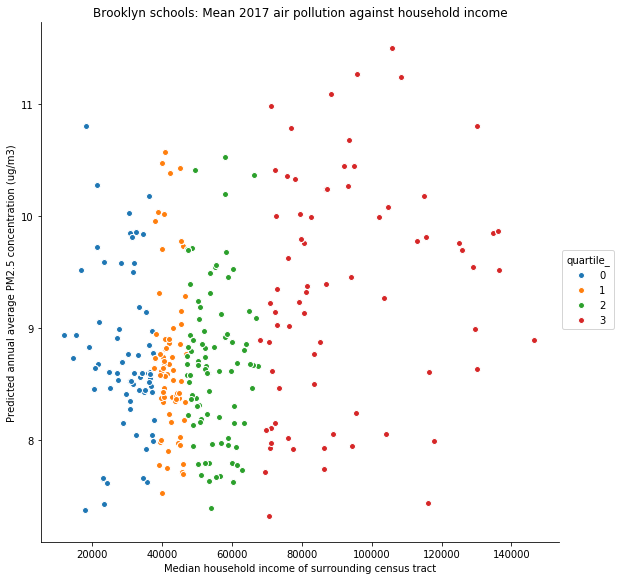

In [28]:
sns.pairplot(x_vars='B19013e1',y_vars='MEAN',data=df,hue='quartile_',size=8)
plt.title('Brooklyn schools: Mean 2017 air pollution against household income')
plt.xlabel('Median household income of surrounding census tract')
plt.ylabel('Predicted annual average PM2.5 concentration (ug/m3)');

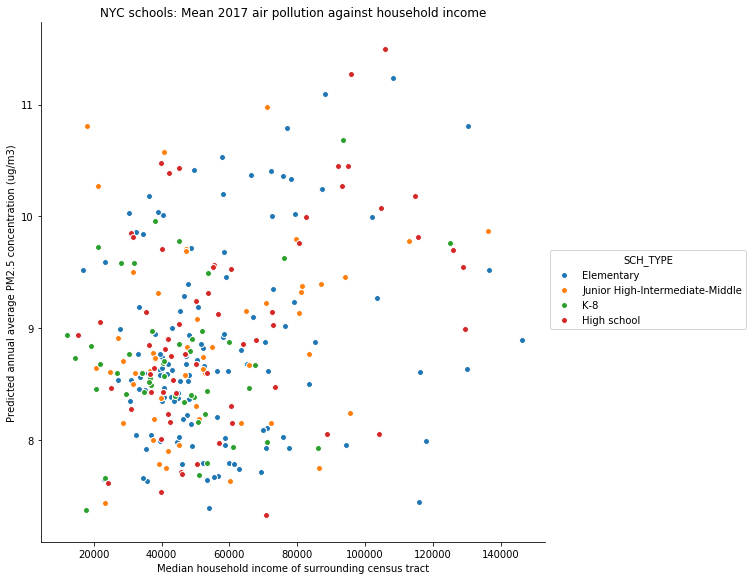

In [29]:
df_SNS = df[df.SCH_TYPE.isin(['Elementary', 'High school','Junior High-Intermediate-Middle','K-8'])]

sns.pairplot(x_vars='B19013e1',y_vars='MEAN',data=df_SNS,hue='SCH_TYPE',size=8)
plt.title('NYC schools: Mean 2017 air pollution against household income')
plt.xlabel('Median household income of surrounding census tract')
plt.ylabel('Predicted annual average PM2.5 concentration (ug/m3)');

In [127]:
help(mpll)

Help on package mplleaflet:

NAME
    mplleaflet

FILE
    /nfshome/nj935/.conda/envs/remote_sensing/lib/python2.7/site-packages/mplleaflet/__init__.py

PACKAGE CONTENTS
    _display
    leaflet_renderer
    links
    maptiles
    mplexporter (package)
    templates (package)
    utils

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...




In [139]:
fig, ax = plt.subplots(1, figsize=(8,10))
df[df.SCH_TYPE=='Elementary'].plot(ax=ax,column='MEAN', cmap='OrRd', edgecolor='k', legend=True,markersize=250)
plt.title("Brooklyn: Elementary Schools by PM2.5 exposure")
mpll.display(fig=ax.figure, crs=df.crs, tiles='cartodb_positron')


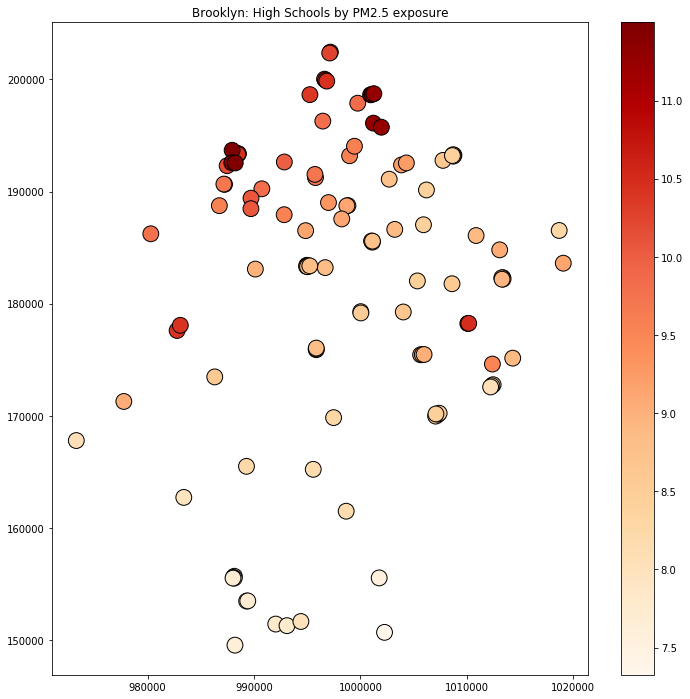

In [117]:
fig, ax = plt.subplots(1, figsize=(12,12))
df[df.SCH_TYPE=='High school'].plot(ax=ax,column='MEAN', cmap='OrRd', edgecolor='k', legend=True,markersize=250)
plt.title("Brooklyn: High Schools by PM2.5 exposure");

In [119]:
mpll.display(fig=ax.figure, crs=df.crs, tiles='cartodb_positron')

In [91]:
df_high=df[df.SCH_TYPE=="High school"]
df_high.shape
df_el_dangerous = df_el[df_el.MEAN>10]

In [103]:
df_el_dangerous[['SCHOOLNAME','PRINCIPAL','MEAN']].sort_values(by='MEAN',ascending=False).head(10)

,SCHOOLNAME,PRINCIPAL,MEAN
44,P.S. 147 ISSAC REMSEN,JULIA DRAKE,11.272182
85,P.S. 196 TEN EYCK,Janine Colon,11.272182
43,P.S. 146,ANNA ALLANBROOK,11.241264
17,P.S. 110 THE MONITOR,ANNA CANO AMATO,11.096331
1456,P.S. 058 THE CARROLL,GISELLE MCGEE,10.808364
162,P.S. 287 BAILEY K. ASHFORD,Ms. Michele Rawlins,10.806138
1438,P.S. 034 OLIVER H. PERRY,ALICJA WINNICKI,10.788123
0,P.S. 001 THE BERGEN,Jennifer Eusanio,10.528325
1423,P.S. 017 HENRY D. WOODWORTH,Dr. Robert Marchi,10.452088
1430,P.S. 024,CHRISTINA FUENTES,10.430622
